keypoints: 104, descriptors: (104, 32)
keypoints: 86, descriptors: (86, 32)
(104,)


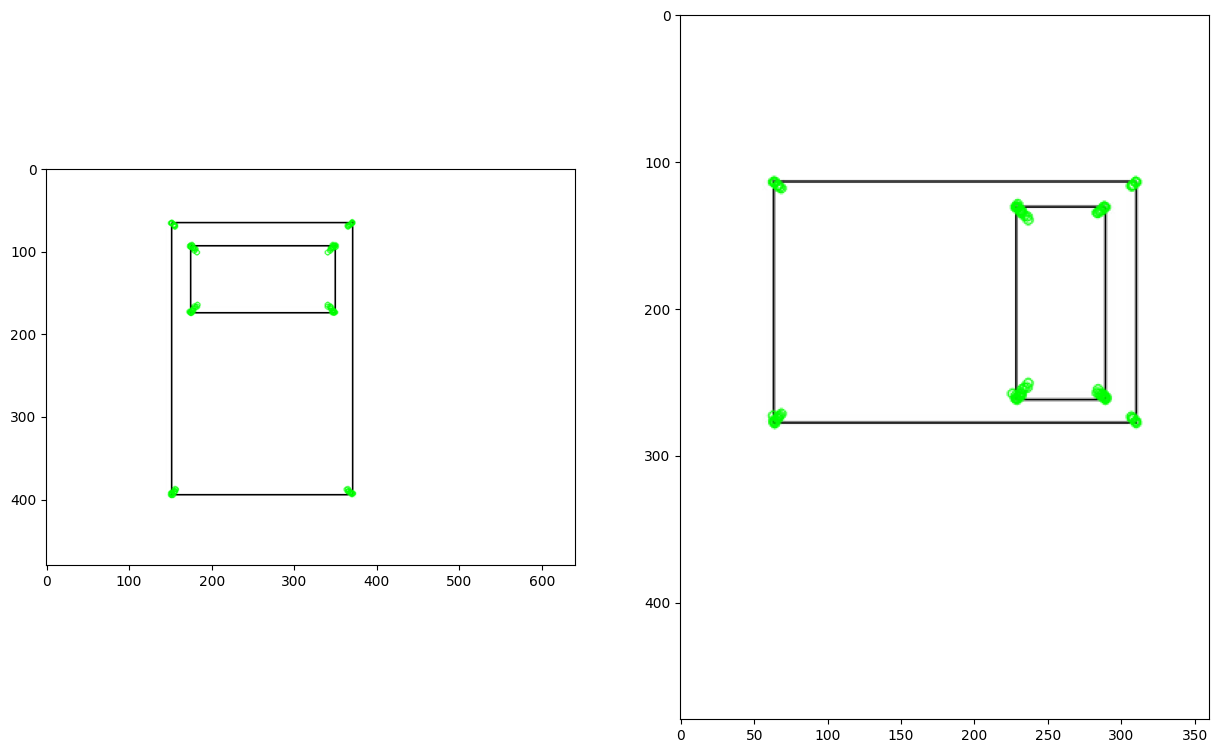

In [11]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

im = cv2.imread("./images/book-r.png", cv2.IMREAD_COLOR)
imReference = cv2.imread("./images/book.png", cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(imReference, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

#TODO bu kismi detaylandir detect and compute ayri ayri yap
#TODO kp@ler ne  işe yarıyor, nasıl hesaplanıyor
#TODO des'ler ne işe yarıyor, nasıl hesaplanıyor 
#TODO 
# kp1, des1 = orb.detectAndCompute(img1, None)
# kp2, des2 = orb.detectAndCompute(img2, None)

kp1 = orb.detect(img1)
kp2 = orb.detect(img2)

kp1, des1 = orb.compute(img1, kp1)
kp2, des2 = orb.compute(img2, kp2)

print("keypoints: {}, descriptors: {}".format(len(kp1), des1.shape))
print("keypoints: {}, descriptors: {}".format(len(kp2), des2.shape))
print(f"{np.shape(kp1)}")

# DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS , DEFAULT , DRAW_OVER_OUTIMG, NOT_DRAW_SINGLE_POINTS
img_keypoints = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
img_keypoints2 = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# display images with keypoints dotted
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img_keypoints)
plt.subplot(122)
plt.imshow(img_keypoints2)

In [12]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

print(f"Found {len(matches)} matches.")

# TODO bu blok nasıl çalışıyor
matches = sorted(matches, key=lambda x: x.distance, reverse=False)
numGoodMatches = int(len(matches) * 0.10)
matches = matches[:numGoodMatches]

print("matches: {}".format(len(matches)))

img3 = cv2.drawMatches(img2, kp2, img1, kp1, matches,None)

plt.figure(figsize=(20,10))
plt.imshow(img3)


Found 104 matches.
matches: 10


error: OpenCV(4.8.1) /io/opencv/modules/features2d/src/draw.cpp:241: error: (-215:Assertion failed) i1 >= 0 && i1 < static_cast<int>(keypoints1.size()) in function 'drawMatches'


Estimated homography : 
 [[ 6.97339343e-01 -7.01799321e-01  5.80174759e+02]
 [ 6.89060191e-01  7.05113040e-01  9.52045298e+01]
 [-2.31573246e-05  6.00620204e-07  1.00000000e+00]]
Image ref shape: (865, 510)


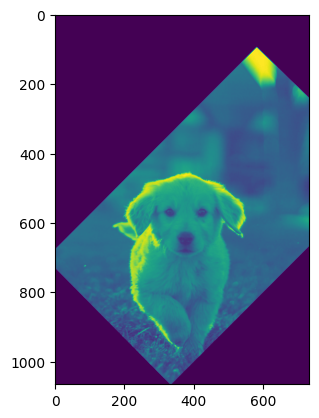

In [ ]:
points_1 = np.zeros((len(matches), 2), dtype=np.float32)
points_2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points_1[i, :] = kp1[match.queryIdx].pt
    points_2[i, :] = kp2[match.trainIdx].pt

# TODO bu blok nasıl çalışıyor
h, mask = cv2.findHomography(points_1, points_2, cv2.RANSAC)

height, width, channels = imReference.shape
im1_reg = cv2.warpPerspective(img1, h, (width, height))

print("Estimated homography : \n",  h)
print(f"Image ref shape: {img1.shape}")
plt.imshow(im1_reg)
